In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import time
import datetime
import glob
import matplotlib.patches as mpatches



In [2]:
#this assumes only 1 ina file and 1 selenium file in directory!!!
testDirectoryName = "smallVSlargeimage_pingpong_jan14_round3/" #must end with a /
testDirectoryPath = "C:/Users/Alex/Documents/solarserver/aggregator/" + testDirectoryName
fileList = glob.glob(testDirectoryPath  + "*.csv")

print(testDirectoryPath)
fileList

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3/


['C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3\\ina219-2020-01-14-1579039026.csv',
 'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3\\selenium-2020-01-14-1579039032.csv']

In [3]:
inaFileName = [k for k in fileList if 'ina' in k]

inaFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3\\ina219-2020-01-14-1579039026.csv'

In [4]:
selFileName = [k for k in fileList if 'selenium' in k]

selFileName[0]

'C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3\\selenium-2020-01-14-1579039032.csv'

In [5]:
#For CSV files
inaData = pd.read_csv(inaFileName[0]).fillna(0)

In [6]:
print(inaData.shape)
inaData.head()

(10640, 3)


,mA,V,time
0,579.1,4.464,1.579039e+09
1,580.1,4.464,1.579039e+09
2,580.7,4.464,1.579039e+09
3,581.9,4.464,1.579039e+09
4,579.3,4.464,1.579039e+09


In [7]:
#add power
type(inaData)

pandas.core.frame.DataFrame

In [8]:
inaData.insert(2, 'watts', (inaData.mA / 1000.0) * inaData.V, True)

In [9]:
inaData.head()

,mA,V,watts,time
0,579.1,4.464,2.585102,1.579039e+09
1,580.1,4.464,2.589566,1.579039e+09
2,580.7,4.464,2.592245,1.579039e+09
3,581.9,4.464,2.597602,1.579039e+09
4,579.3,4.464,2.585995,1.579039e+09


In [10]:
#averages per second

inaLength = inaData.shape[0]
inaStartTime = inaData.time[0]
inaEndTime = inaData.time[inaData.shape[0]-1]
inaTimePeriod = inaEndTime - inaStartTime
dataPerSecond =inaLength/inaTimePeriod

dataPerSecond


15.201213347689775

In [11]:
averagedINA = pd.DataFrame(columns=['mA','V','watts','time'])

for av in list(range(int(inaTimePeriod))):
    avmA= inaData.loc[(15*av):((15*av)+14)]['mA'].sum()/15
    avV = inaData.loc[(15*av):((15*av)+14)]['V'].sum()/15
    avWatts = inaData.loc[(15*av):((15*av)+14)]['watts'].sum()/15
    avTime = inaData.loc[(15*av):(15*av)]['time'][inaData.loc[(15*av):(15*av)]['time'].index[0]]
    averagedINA = averagedINA.append({'mA' : avmA , 'V' : avV, 'watts': avWatts,'time': avTime},ignore_index=True)

    

In [12]:
print(averagedINA.shape)
print(averagedINA.tail())

(699, 4)
             mA      V     watts          time
694  579.880000  4.464  2.588584  1.579040e+09
695  579.966667  4.464  2.588971  1.579040e+09
696  578.806667  4.464  2.583793  1.579040e+09
697  578.626667  4.464  2.582989  1.579040e+09
698  579.973333  4.464  2.589001  1.579040e+09


In [13]:
seleniumData = pd.read_csv(selFileName[0]).fillna(0)


In [14]:
print(seleniumData.shape)
seleniumData.tail()

(188, 2)


,task,time
183,click,1.579040e+09
184,click,1.579040e+09
185,click,1.579040e+09
186,click,1.579040e+09
187,stop v2 3,1.579040e+09


In [15]:
seleniumData.task.loc[0]

'start v1 0'

In [16]:
# get start and stop times

testTimes = []

currentRound = 0
for getT in list(range(seleniumData.shape[0])):
    
    if 'start' in seleniumData.task.loc[getT]:
        roundTimes = [seleniumData.time.loc[getT]]
    elif 'stop' in seleniumData.task.loc[getT]:
        roundTimes.append(seleniumData.time.loc[getT])
        testTimes.append(roundTimes)
        
testTimes

[[1579039122.081586, 1579039149.2115116],
 [1579039179.2236257, 1579039206.3659165],
 [1579039236.3810802, 1579039264.739137],
 [1579039294.7478008, 1579039320.9096842],
 [1579039350.918298, 1579039378.9549901],
 [1579039408.9636285, 1579039435.094721],
 [1579039465.1033692, 1579039493.232916],
 [1579039523.2414794, 1579039549.6547275]]

In [17]:
#make new data frames with power data from only test durations

dataFrameSplits = []

#print(averagedINA)
for splitTests in list(range(len(testTimes))):
    dataFrameSplits.append(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])
    #print(dataFrameSplits[splitTests])
    #print(averagedINA.loc[(averagedINA.loc[:,'time']>=(testTimes[splitTests][0])) & (averagedINA.loc[:,'time']<=testTimes[splitTests][1])])
print(len(dataFrameSplits))

dataFrameSplits

8


[             mA      V     watts          time
 97   579.680000  4.464  2.587692  1.579039e+09
 98   579.666667  4.464  2.587632  1.579039e+09
 99   579.833333  4.464  2.588376  1.579039e+09
 100  580.126667  4.464  2.589685  1.579039e+09
 101  583.680000  4.464  2.605548  1.579039e+09
 102  582.920000  4.464  2.602155  1.579039e+09
 103  582.653333  4.464  2.600964  1.579039e+09
 104  583.006667  4.464  2.602542  1.579039e+09
 105  582.073333  4.464  2.598375  1.579039e+09
 106  581.753333  4.464  2.596947  1.579039e+09
 107  581.626667  4.464  2.596381  1.579039e+09
 108  582.840000  4.464  2.601798  1.579039e+09
 109  582.446667  4.464  2.600042  1.579039e+09
 110  582.693333  4.464  2.601143  1.579039e+09
 111  585.633333  4.464  2.614267  1.579039e+09
 112  582.720000  4.464  2.601262  1.579039e+09
 113  580.880000  4.464  2.593048  1.579039e+09
 114  582.080000  4.464  2.598405  1.579039e+09
 115  584.066667  4.464  2.607274  1.579039e+09
 116  580.906667  4.464  2.593167  1.579

In [18]:
#get the max and mins for each test set

for mX in list(range(len(dataFrameSplits))):
    print('------'+str(mX)+'------')
    print ('Max:')
    print (np.max(dataFrameSplits[mX].watts))
    print ('Min:')
    print (np.min(dataFrameSplits[mX].watts))
            

------0------
Max:
2.6142672000000005
Min:
2.58691776
------1------
Max:
2.5918876799999992
Min:
2.5858166399999996
------2------
Max:
2.60947584
Min:
2.5846262399999995
------3------
Max:
2.58938784
Min:
2.58298944
------4------
Max:
2.6009644800000005
Min:
2.5839417600000005
------5------
Max:
2.5900128
Min:
2.58367392
------6------
Max:
2.6120947200000004
Min:
2.5829001599999994
------7------
Max:
2.5887331199999997
Min:
2.58290016


In [19]:
#obviously this isn't automated...

#large average peak
lPeakAVG =(2.6139504000000002 + 2.596789200000001 + 2.5888593333333336 + 2.6099552000000004) * 0.25

#small overall peak
sPeakAVG =(2.294001466666667+2.293759333333334+2.2986020000000003+2.2974821333333337)* 0.25

print("Large Peak AVG: " + str(lPeakAVG))
print("Small Peak AVG: " + str(sPeakAVG))

#peak differences
print("AVG Peak Difference: " + str(lPeakAVG-sPeakAVG))

Large Peak AVG: 2.602388533333334
Small Peak AVG: 2.2959612333333337
AVG Peak Difference: 0.3064273000000002


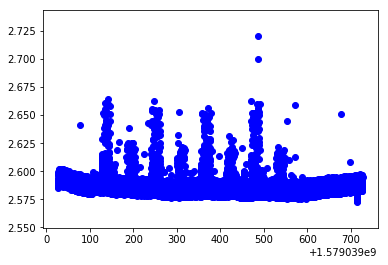

In [20]:

#graph ina219 all data
plt.scatter(x=inaData.loc[:,'time'], y=inaData.loc[:,'watts'], color='b')


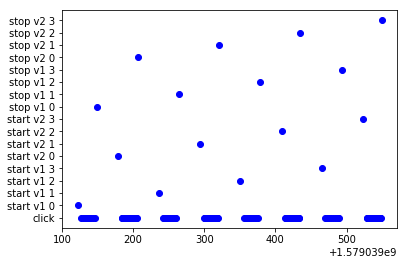

In [21]:
# graph all selenium data
plt.scatter(x=seleniumData.loc[:,'time'], y=seleniumData.loc[:,'task'], color='b')

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3/voltage_2020-01-14-1579039918.png


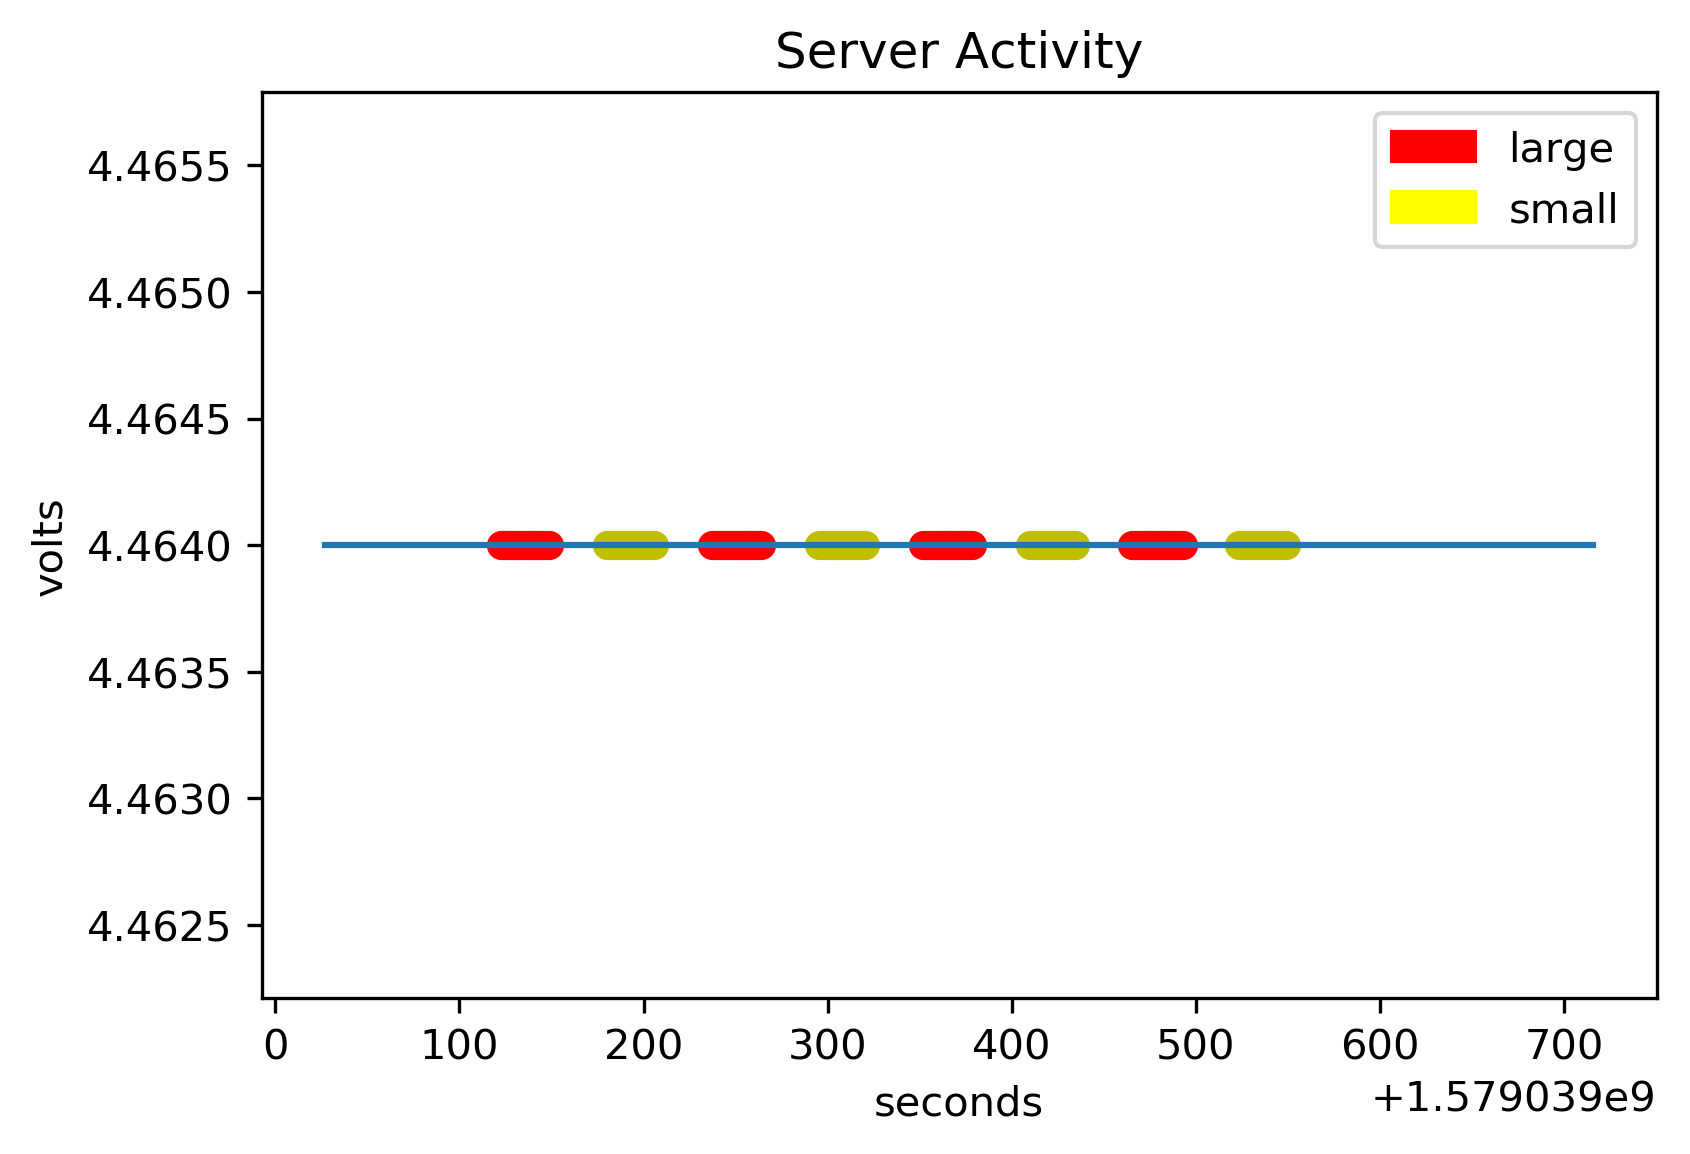

In [22]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'V']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='volts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'V'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='small')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')


plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"voltage_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3/current_2020-01-14-1579039920.png


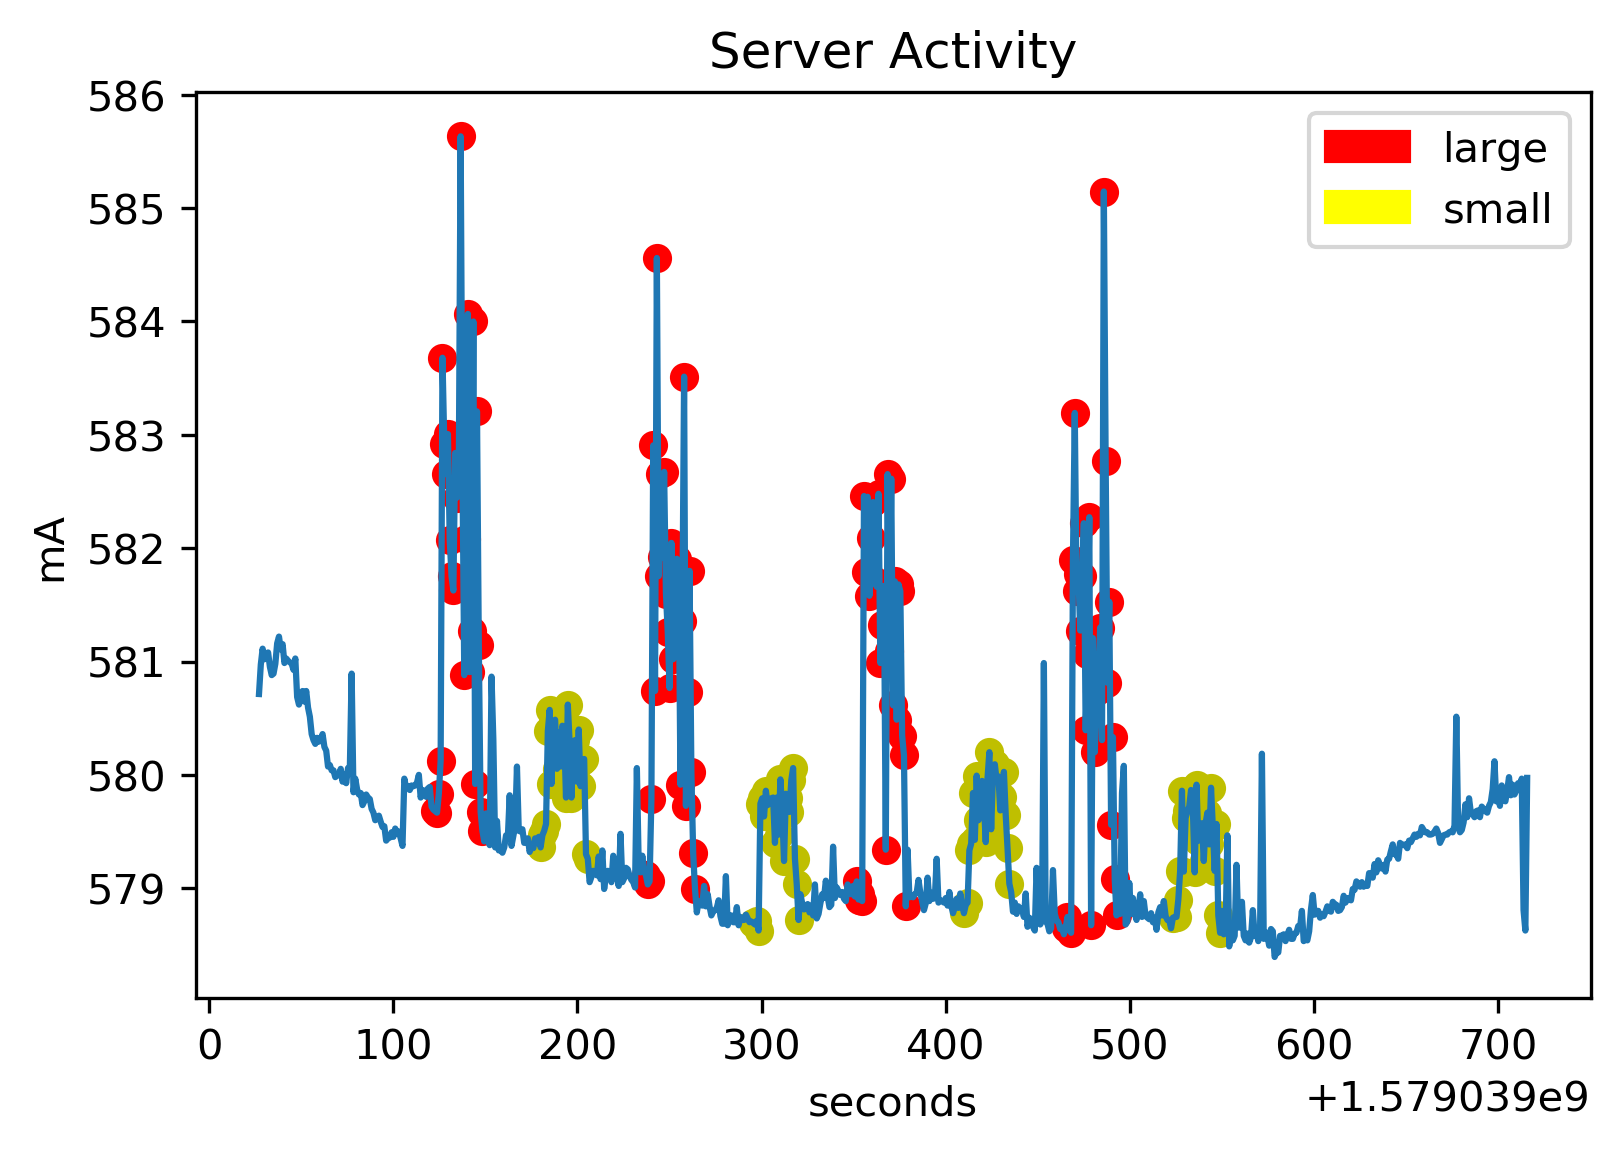

In [23]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'mA']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='mA',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'mA'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"current_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3/watts_2020-01-14-1579039929.png


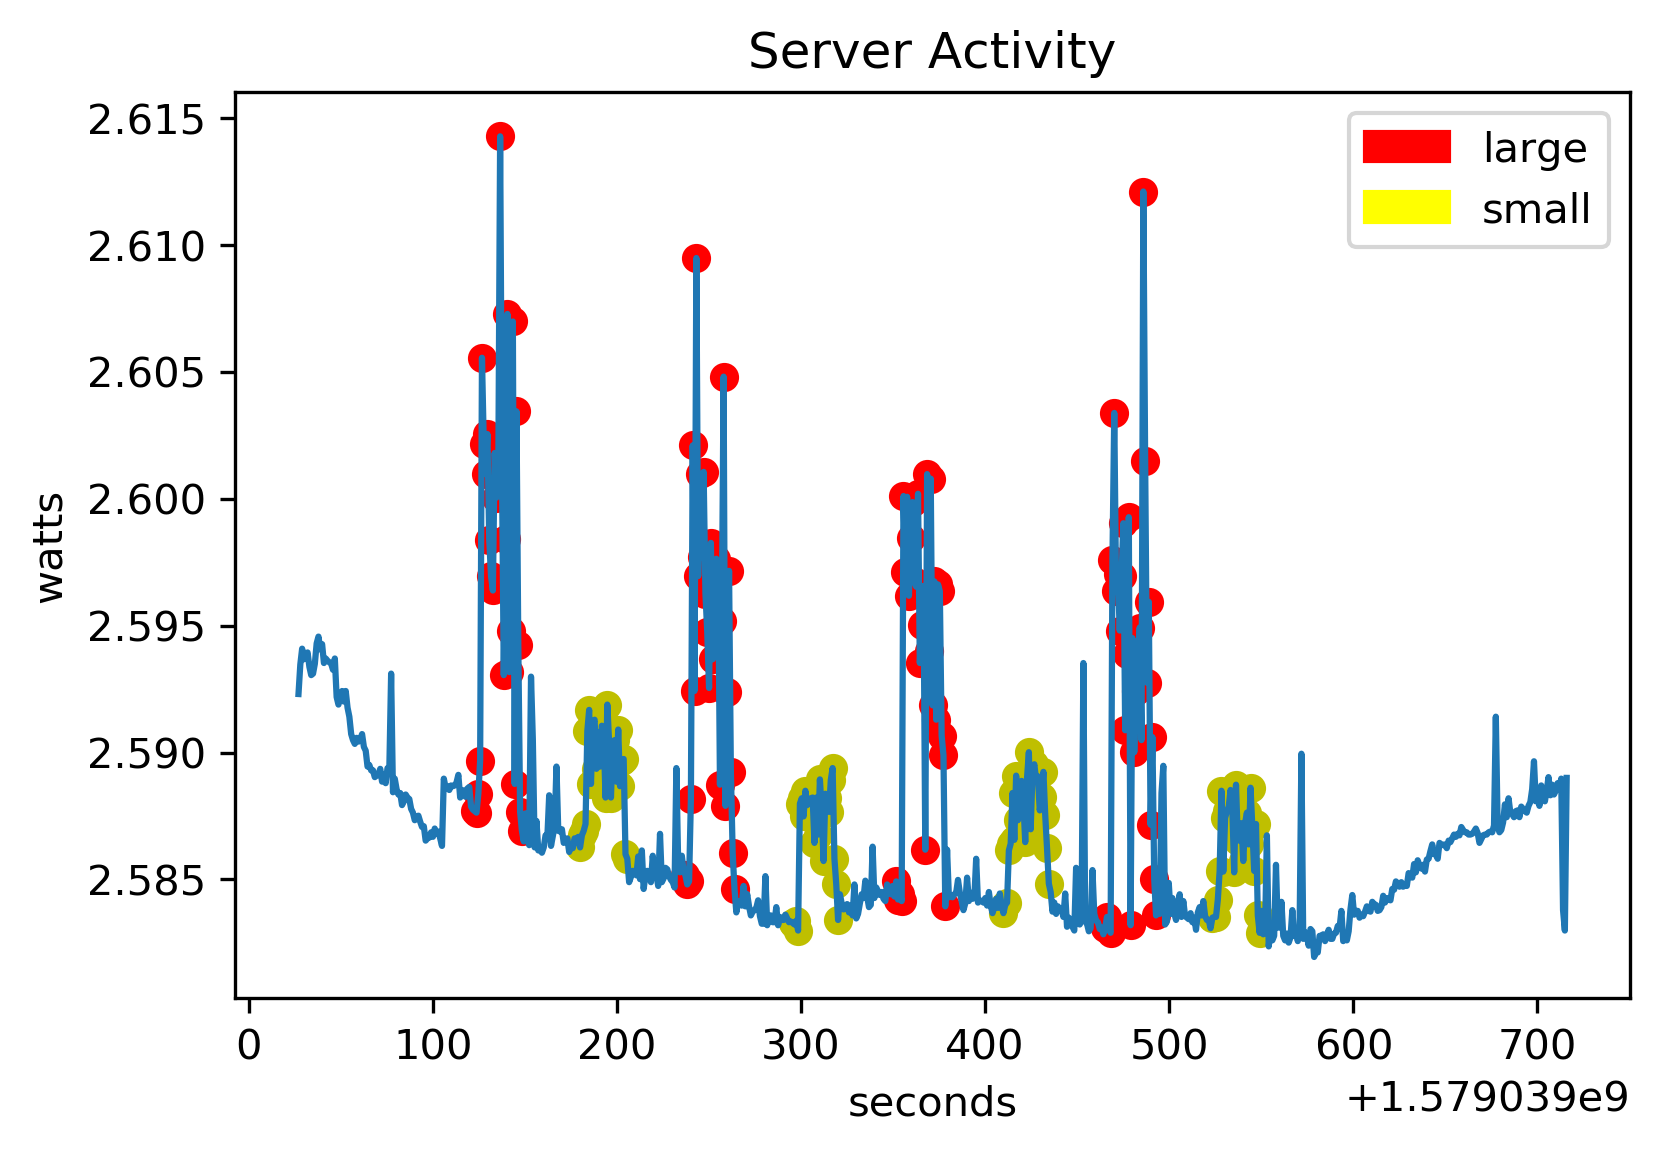

In [24]:
fig, ax = plt.subplots(dpi=300)

x = averagedINA.loc[:,'time']
y = averagedINA.loc[:,'watts']
ax.plot(x,y)

ax.set(xlabel='seconds', ylabel='watts',
       title='Server Activity')

colors = ['r','y','b','g']
for plotNum in list(range(len(dataFrameSplits))):
    ax.scatter(x=dataFrameSplits[plotNum].loc[:,'time'], y=dataFrameSplits[plotNum].loc[:,'watts'], color=colors[plotNum%2])

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName1 = testDirectoryPath +"watts_"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName1)
fig.savefig(pngName1)
plt.show()

In [25]:
overlayData = dataFrameSplits
overlayData[2]

,mA,V,watts,time
213,579.113333,4.464,2.585162,1.579039e+09
214,579.033333,4.464,2.584805,1.579039e+09
215,579.060000,4.464,2.584924,1.579039e+09
216,579.786667,4.464,2.588168,1.579039e+09
217,582.906667,4.464,2.602095,1.579039e+09
218,580.740000,4.464,2.592423,1.579039e+09
219,584.560000,4.464,2.609476,1.579039e+09
220,581.753333,4.464,2.596947,1.579039e+09
221,582.653333,4.464,2.600964,1.579039e+09
222,581.920000,4.464,2.597691,1.579039e+09


In [26]:
list(range(len(dataFrameSplits)))

[0, 1, 2, 3, 4, 5, 6, 7]

In [27]:
overlayData[0]

,mA,V,watts,time
97,579.680000,4.464,2.587692,1.579039e+09
98,579.666667,4.464,2.587632,1.579039e+09
99,579.833333,4.464,2.588376,1.579039e+09
100,580.126667,4.464,2.589685,1.579039e+09
101,583.680000,4.464,2.605548,1.579039e+09
102,582.920000,4.464,2.602155,1.579039e+09
103,582.653333,4.464,2.600964,1.579039e+09
104,583.006667,4.464,2.602542,1.579039e+09
105,582.073333,4.464,2.598375,1.579039e+09
106,581.753333,4.464,2.596947,1.579039e+09


In [28]:
for overlays in list(range(len(dataFrameSplits))):
    overlayData[overlays].insert(4, 'scaled', overlayData[overlays].time - overlayData[overlays].time[overlayData[overlays].time.index[0]], True)

#overlayData

C:/Users/Alex/Documents/solarserver/aggregator/smallVSlargeimage_pingpong_jan14_round3/aggregator_overlay-2020-01-14-1579041254.png


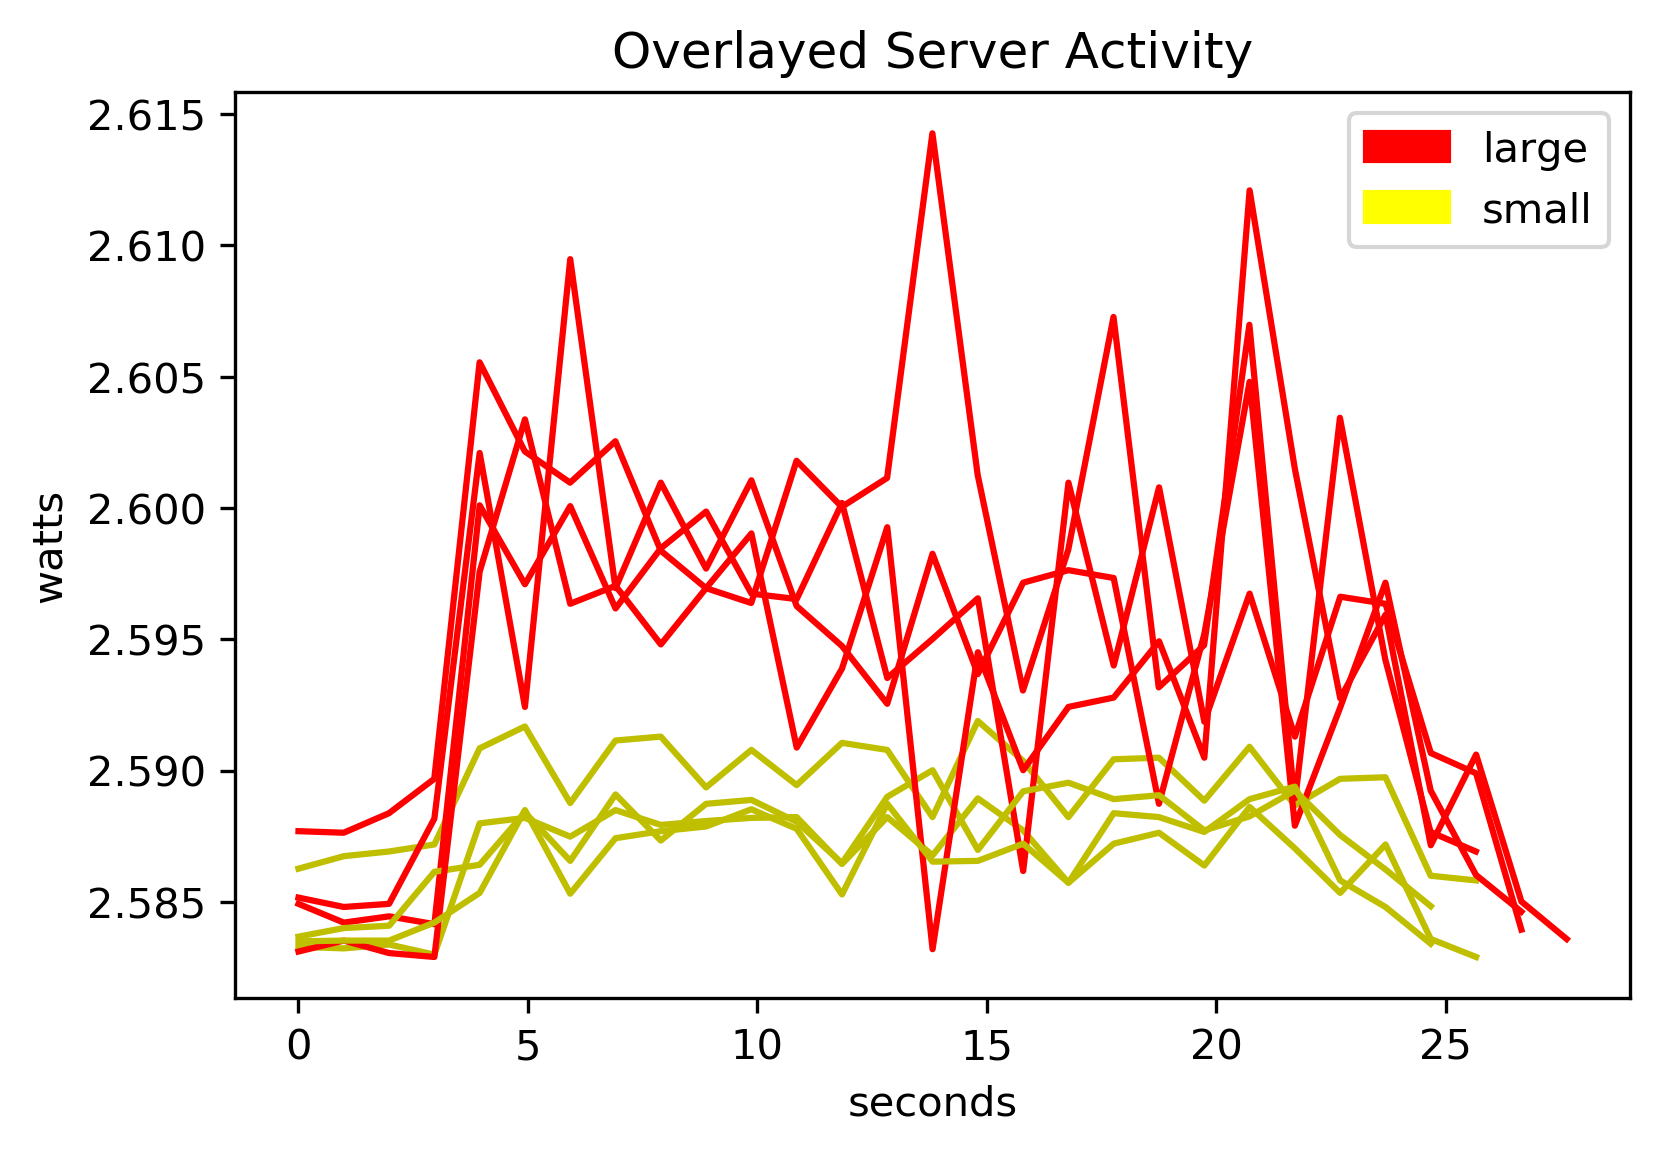

In [37]:
fig, ax = plt.subplots(dpi=300)
'''
x = overlayD1.loc[:,'scaled']
y = overlayD1.loc[:,'watts']
ax.plot(x,y, color='r')

ax.set(xlabel='time', ylabel='watts',
       title='Overlayed Server Activity')

'''

colors = ['r','y','b','g']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='blue', label='large image')
yellowLabel = mpatches.Patch(color='yellow', label='small')
greenLabel = mpatches.Patch(color='green', label='small image')

plt.legend(handles=[redLabel, yellowLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()

In [30]:
#averages
averagedData = dataFrameSplits

In [31]:
averagedData[0].shape[0]

27

In [32]:
#find the shortest length of the data sets
dataLengths = []

for mins in list(range(len(overlayData))):
    dataLengths.append(averagedData[mins].shape[0])
minData = min(dataLengths)

minData

26

In [33]:
averagedData[2].watts.loc[averagedData[2].index[6]]

2.60947584

In [34]:
averagedData[0].head()

,mA,V,watts,time,scaled
97,579.680000,4.464,2.587692,1.579039e+09,0.000000
98,579.666667,4.464,2.587632,1.579039e+09,0.984915
99,579.833333,4.464,2.588376,1.579039e+09,1.972029
100,580.126667,4.464,2.589685,1.579039e+09,2.958696
101,583.680000,4.464,2.605548,1.579039e+09,3.946599


In [35]:
newAveragedDataL = []
newAveragedDataS = []

#loop through all data points
for sumum in list(range(minData)):
    #add up that data point for each set
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)].watts.loc[averagedData[(getVal*2)].index[sumum]])
    newAveragedDataL.append(np.mean(summedUp))
    
    summedUp = []
    for getVal in list(range(int(len(averagedData)/2))):
        summedUp.append(averagedData[(getVal*2)+1].watts.loc[averagedData[(getVal*2)+1].index[sumum]])
    newAveragedDataS.append(np.mean(summedUp))
    
print(newAveragedDataL)
print(newAveragedDataS)
    

[2.5852214399999998, 2.5850428799999996, 2.5851991200000004, 2.58622584, 2.6013290399999995, 2.59876224, 2.6017159199999997, 2.59817448, 2.5981521599999997, 2.5978619999999997, 2.59830096, 2.59636656, 2.5972147199999998, 2.59661952, 2.59768344, 2.5965004799999996, 2.5915975199999997, 2.59735608, 2.5978471199999995, 2.5944024, 2.5930780799999997, 2.6051532, 2.5923564, 2.5962995999999996, 2.59592016, 2.58868104]
[2.58417984, 2.58437328, 2.5844774399999997, 2.58513216, 2.58764688, 2.5891944, 2.58702936, 2.5890381599999994, 2.588562, 2.5885099199999995, 2.58909768, 2.588376, 2.58731208, 2.5891869599999993, 2.58788496, 2.5885917599999995, 2.5886289599999994, 2.5873046399999993, 2.5887331199999997, 2.588852159999999, 2.5876543199999995, 2.58917208, 2.58858432, 2.5870963199999997, 2.58699216, 2.5844551199999994]


In [36]:
# make a new data frame


someAveragedData = {'large' : newAveragedDataL ,'small' : newAveragedDataS , 'time': averagedData[4].loc[:,'scaled']}

averagedDF = pd.DataFrame(someAveragedData)


#get subsection
averagedDF = averagedDF.loc[(averagedDF.loc[:,'time']>= 7)  & (averagedDF.loc[:,'time'] <= 27)]

avgLarge = np.mean(averagedDF.large)
avgSmall = np.mean(averagedDF.small)

print("Average power draw of large image: " + str(avgLarge))
print("Average power draw of small image: " + str(avgSmall))

# Declare a list that is to be converted into a column 

averagedDF = averagedDF.assign(largeAVG=avgLarge)
averagedDF = averagedDF.assign(smallAVG=avgSmall)

#averagedDF

avgTimeInterval = averagedDF.iloc[-1].time-averagedDF.iloc[0].time
print("Time interval for averages: " + str(avgTimeInterval))

lPower = (avgLarge*1000)/avgTimeInterval
sPower = (avgSmall*1000)/avgTimeInterval
print("Large energy = " + str(lPower) + " milliwatt-seconds")
print("Small energy = " + str(sPower) + " milliwatt-seconds")
print("Large energy = " + str(lPower/3600) + " milliwatt-hours")
print("Small energy = " + str(sPower/3600) + " milliwatt-hours")

ValueError: array length 26 does not match index length 28

ValueError: x and y must have same first dimension, but have shapes (29,) and (26,)

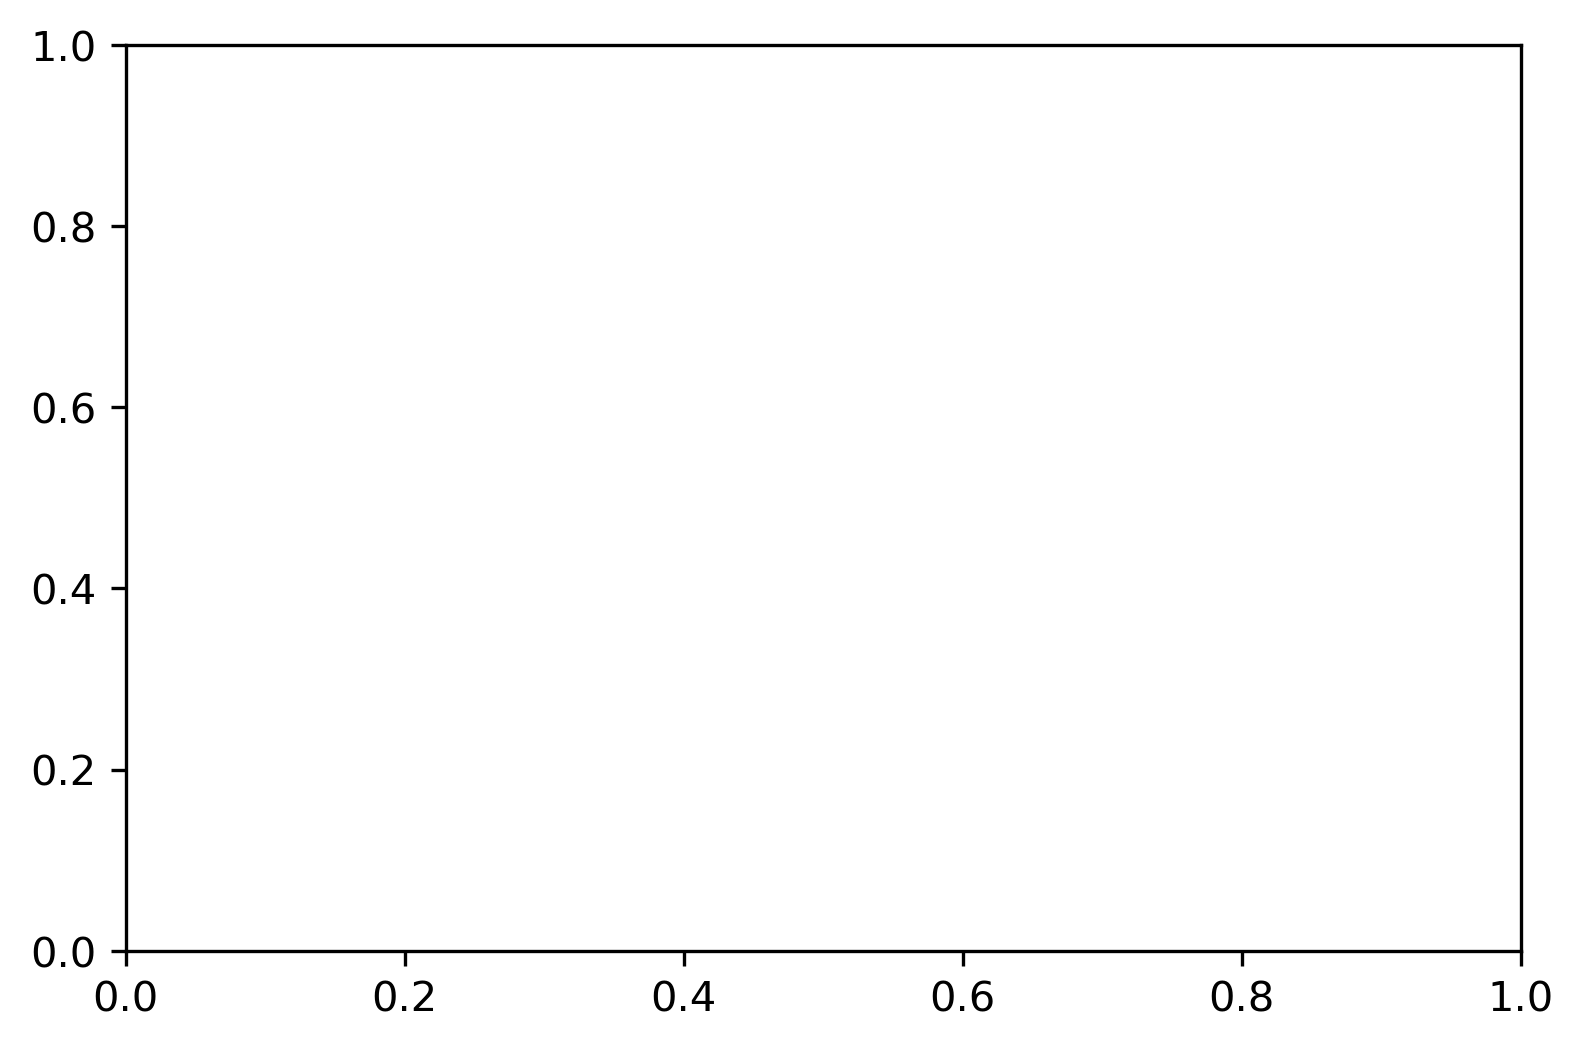

In [290]:
fig, ax = plt.subplots(dpi=300)


plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
plt.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'smallAVG'], color='g')
plt.plot(averagedDF.loc[:,'time'], averagedDF.loc[:,'largeAVG'], color='g')

ax.set(xlabel='seconds', ylabel='watts',
       title='Averaged Server Activity')

blueLabel = mpatches.Patch(color='blue', label='avg large')
greenLabel = mpatches.Patch(color='g', label='avg peaks')
yellowLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[blueLabel, yellowLabel, greenLabel])

#ax.grid()
pngName3 = testDirectoryPath +"aggregator_averaged-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName3)
fig.savefig(pngName3)
plt.show()


In [ ]:
fig, ax = plt.subplots(dpi=300)

colors = ['r','y']
for plotNum in list(range(len(overlayData))):
    ax.plot(overlayData[plotNum].loc[:,'scaled'], overlayData[plotNum].loc[:,'watts'], color=colors[plotNum%2])

    
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataL, color='b')
ax.plot(averagedData[4].loc[:,'scaled'], newAveragedDataS, color='purple')

ax.set(xlabel='seconds', ylabel='watts',
       title='Overlayed Server Activity w/ Averages')

#ax.scatter(x=overlayD1.loc[:,'scaled'], y=overlayD1.loc[:,'watts'], color='r')
#ax.plot(overlayS1.loc[:,'scaled'], overlayS1.loc[:,'watts'], color='y')

redLabel = mpatches.Patch(color='red', label='large')
blueLabel = mpatches.Patch(color='b', label='avg large')
yellowLabel = mpatches.Patch(color='yellow', label='small')
purpleLabel = mpatches.Patch(color='purple', label='avg small')

plt.legend(handles=[redLabel, blueLabel, yellowLabel, purpleLabel])

#ax.grid()
pngName2 = testDirectoryPath +"aggregator_overlay-"+str(datetime.date.today())+"-"+str(int(time.time()))+".png"
print(pngName2)
fig.savefig(pngName2)
plt.show()